###### <font color="#483D8B">
<h1  align="center">Unsupervised Clustering Models in Machine Learning</h1>
<h3 align="center"> Ansh Sikka</h3>
<h3 align="center"> 04/02/2018</h3>

## Overview

### Goals and Skills
* Compare multiple clustering models for same dataset in Python
* K-means
* Agglomerative Clustering
* Affinity Propagation
* Gaussian Mixture
* Visualize clustering model output
* Scatterplot (variable value distributions in clusters)
* Boxplot (variable value distributions in clusters)
* Scaling technique – represent cluster by aggregation

In [146]:
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram # compute dendogram for visualizing distances (Agglomerative)
from sklearn.metrics import silhouette_score

import os                     # For os related operations
import sys                    # For data size

## Data 

We are using data from the 2016 World Happiness Report. It is found at https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python/data. It is the 2016.csv

In [147]:
wh = pd.read_csv("2016.csv") #Read the dataset

## Exploratory Data Analysis

In [148]:
wh.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


As we can see here, we have the same count for all columns. The hapiness rank has a rather high standard deviation, meaning it has a larger range over the set of different ranks of countries. This means that there is a high variability of hapiness worldwide. 

In [149]:
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

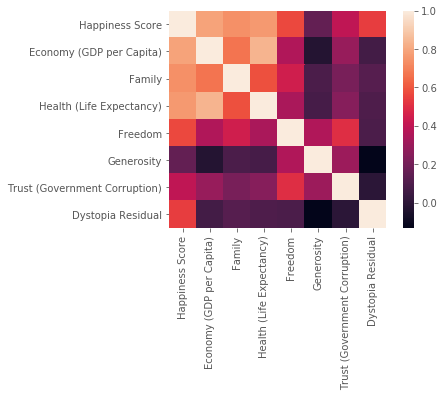

In [150]:
wh1 = wh[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
          'Generosity','Trust (Government Corruption)','Dystopia Residual']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

### Interpretation
As we can see here, the diagnals always have a 1.0 correlation since they every variable is related to itself along the diagonal.

We can see that economy and health are possibly very impactful to happiness scores as they correlate to happiness score at around 0.8. Generosity is one of the lowest factors contributing to hapiness score, but correlates to a more political standpoint. 

## Data Pre-processing
We must convert all values to a standardized scalar (numerical) system for the system to perform clustering operations. 

In [151]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(wh1)

array([[ 1.88379206,  1.1862989 ,  1.39218336, ...,  0.89309199,
         2.77282187,  0.76520031],
       [ 1.86885399,  1.39430839,  1.32259655, ...,  0.28647245,
         2.47919242,  0.68238663],
       [ 1.86182431,  1.14953556,  1.46560684, ...,  1.7561448 ,
         0.10955759,  0.93537909],
       ...,
       [-1.82700053, -1.63550608, -2.98516507, ..., -0.50600309,
        -0.19653981, -0.3522848 ],
       [-2.03261868, -0.50255339, -2.42598809, ...,  1.81007154,
         0.3135623 , -2.7899043 ],
       [-2.17672713, -2.15320779, -2.10340624, ..., -0.29802139,
        -0.39241324, -0.41030618]])

## Models 

### K-Means Clustering
K-Means clustering is a simple clustering algorithm where the user passes in the number of clusters. These clusters will then be formed based on the nearest points to the center value. The initial center value is picked at random and the algorithm re-adjusts this center point to become more similar to that cluster grouping.

In [152]:
def doKmeans(X, nclust=3):
    
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent, model)

clust_labels, cent, model = doKmeans(wh1, 3)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

In [153]:
# split df into cluster groups
df_heat = wh1.filter(['Economy (GDP per Capita)', 'kmeans'], axis=1)
grouped = df_heat.groupby(['kmeans'], sort=True)
 
# compute average for each cluster
means = grouped.mean()
means

,Economy (GDP per Capita)
kmeans,
0,1.341650
1,0.553709
2,0.982444


Text(0.5, 1.0, '')

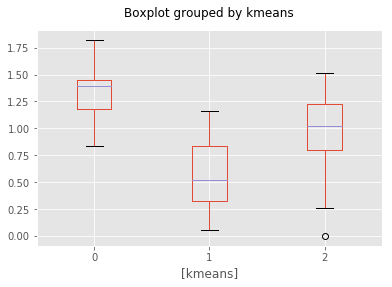

In [154]:
df_boxplot = wh1.filter(['Economy (GDP per Capita)', 'kmeans'], axis=1)

plt.style.use('ggplot')
df_plt = df_boxplot.sort_values(by=['kmeans'])
fig = df_plt.boxplot(by=['kmeans'])
fig.set_title('')

#### Evaluation
Since we can't really test for accuracy the same way we do with supervised learning, we have to take a different approach. With k-means clustering, we can print out the SSE (Sum of distances of the samples to the closest cluster center). The higher the distance, the less accurateit tends to be. We want to minimize the SSE. However, as we increase the number of clusters too much it converges to 0 since at some point, each data would have it's own cluster with 0 distance. We want to find the minima. 

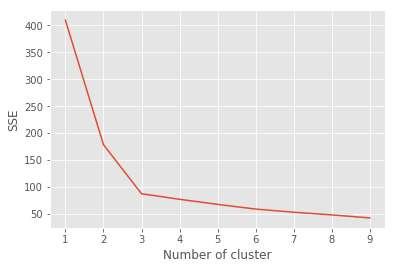

In [155]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter=1000).fit(wh1)
    #data["clusters"] = kmeans[0]
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The silhouette score shows the average distances BETWEEN clusters. 

A good way to interpret this score is by using the following chart: 


| Score       	| Interpretation              	|
|-------------	|-----------------------------	|
| Close to 1  	| Well Defined Clusters       	|
| Close to 0  	| Clusters may be overlapping 	|
| Less than 0 	| Wrong cluster placements.   	|

In [170]:
print(silhouette_score(wh1, clust_labels))


0.6693709825811843


#### Interpretation
As we can see, the optimal number of clusters is 3. If we increase it, we go downwards linearly in SSE, meaning that increasing clusters is just increasing bias towards those certain data points. It is becoming very specific and innacurate. 3 is optimal since that is the lowest point before the constant decrease. 

### Agglomerative Clustering
Agglomerative clustering is a grouping type of approach. All samples start in their own cluster. As the algorithm starts to find similarities, they get merged and the amount of clusters decreases to an set amount. 

In [156]:
def doAgglomerative(X, nclust=3):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(wh1, 3)
agglomerative = pd.DataFrame(clust_labels1)
wh1.insert((wh1.shape[1]),'agglomerative',agglomerative)

We are going to use the euclidean affinity type for easy distance calculations and the ward linkage to reduce variance.

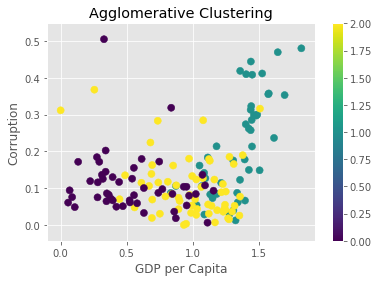

In [157]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy (GDP per Capita)'],wh1['Trust (Government Corruption)'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

Text(0.5, 1.0, '')

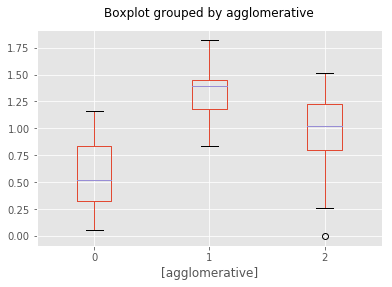

In [158]:
df_boxplot = wh1.filter(['Economy (GDP per Capita)', 'agglomerative'], axis=1)

plt.style.use('ggplot')
df_plt = df_boxplot.sort_values(by=['agglomerative'])
fig = df_plt.boxplot(by=['agglomerative'])
fig.set_title('')

#### Evaluation

In [159]:
Z = linkage(wh1, method='ward')

This linkage feature from scipy will create a matrix of the distances between the merged clusters. We can plot this matrix as a dendogram.

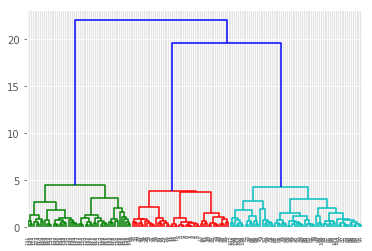

In [160]:
plt.figure()
dendrogram(Z)
plt.show()

The silhouette score shows the average distances BETWEEN clusters. 

A good way to interpret this score is by using the following chart: 


| Score       	| Interpretation              	|
|-------------	|-----------------------------	|
| Close to 1  	| Well Defined Clusters       	|
| Close to 0  	| Clusters may be overlapping 	|
| Less than 0 	| Wrong cluster placements.   	|

In [168]:
print(silhouette_score(wh1, clust_labels1))


0.6693709825811843


#### Interpretation

As we can see, the dendogram shows many leaf nodes at the bottom that are extremely close to each other. This is expectedas many leaf nodes have similar distances. However as we traverse up the dendogram tree, we can see that there is a larger tree (in blue) that shows a larger split between the distances, meaning less similarity. We can tell for sure from this dendogram that there are at least 2 different classes, and there is room for analyzing 3 or more classes for more accurate clustering. The 0.66 silhouette score shows that there might be some overlapping clusters, but since it is closer to 1, there clusters are more well-fitted. The 0.67 silhouette score shows that there are mostly well defined clusters, but some may be overlapping, meaning that there is a possibility of reducing clusters for better results. 

### Affinity Propagation

The affinity propegation algorithm exchanges messages between pairs of data points until a set of similarities emerges, with each similarity corresponding to a cluster. It does not require the number of clusters to be specified before running the algorithm.

See https://medium.com/@aneesha/using-affinity-propagation-to-find-the-number-of-clusters-in-a-dataset-52f5dd3b0760

In [161]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(wh1)
affinity = pd.DataFrame(clust_labels2)
wh1.insert((wh1.shape[1]),'affinity',affinity)

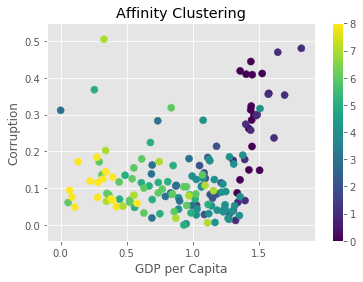

In [162]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy (GDP per Capita)'],wh1['Trust (Government Corruption)'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

Text(0.5, 1.0, '')

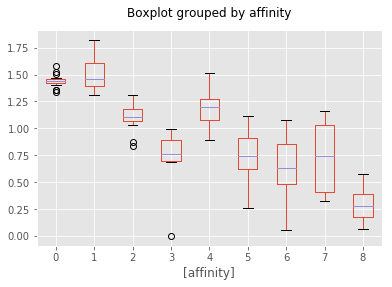

In [163]:
df_affinity_plt = wh1.filter(['Economy (GDP per Capita)', 'affinity'], axis=1)

plt.style.use('ggplot')
df_plt = df_affinity_plt.sort_values(by=['affinity'])
fig = df_plt.boxplot(by=['affinity'])
fig.set_title('')

#### Evaluation

For evaluation of affinity propagation, we will use the silhouette score. The silhouette score shows the average distances BETWEEN clusters. 

A good way to interpret this score is by using the following chart: 


| Score       	| Interpretation              	|
|-------------	|-----------------------------	|
| Close to 1  	| Well Defined Clusters       	|
| Close to 0  	| Clusters may be overlapping 	|
| Less than 0 	| Wrong cluster placements.   	|

In [171]:
print(silhouette_score(wh1, clust_labels2))


0.534985571943625


#### Interpretation
As we can see from the score, it is closer to 1, and it is NOT negative. This means that the clusters are not interfereing as much with each other, butt here is still interference nevertheless. Additionally, since it is not negative, there are likely no wrongly placed clusters. This is a strong model, but it might have it's drawbacks isnce it isn't perfect and some clusters may have overlapping similarities.

### Gaussian Mixture
A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

See https://scikit-learn.org/stable/modules/mixture.html


In [165]:
def doGMM(X, nclust=3):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(wh1,3)
gmm = pd.DataFrame(clust_labels3)
wh1.insert((wh1.shape[1]),'gmm',gmm)

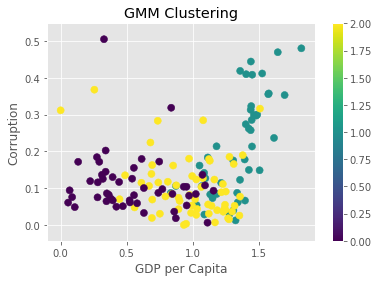

In [166]:
#Plotting the cluster obtained using GMM
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy (GDP per Capita)'],wh1['Trust (Government Corruption)'],
                     c=gmm[0],s=50)
ax.set_title('GMM Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

Text(0.5, 1.0, '')

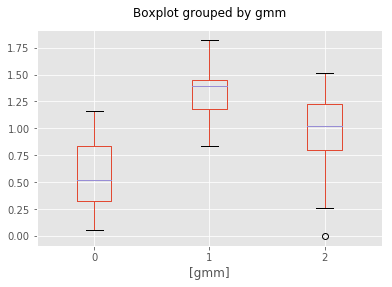

In [167]:
df_gmm_plt = wh1.filter(['Economy (GDP per Capita)', 'gmm'], axis=1)

plt.style.use('ggplot')
df_plt = df_gmm_plt.sort_values(by=['gmm'])
fig = df_plt.boxplot(by=['gmm'])
fig.set_title('')

#### Evaluation
To make things simple as possible, we can evaluate this model using the silhouette score. Again, this is the criteria for the silhouette score:


| Score       	| Interpretation              	|
|-------------	|-----------------------------	|
| Close to 1  	| Well Defined Clusters       	|
| Close to 0  	| Clusters may be overlapping 	|
| Less than 0 	| Wrong cluster placements.   	|

In [172]:
print(silhouette_score(wh1, clust_labels3))


0.6693709825811843


#### Interpretation
We can see that this yielded about the same score as k-means clustering. We can see that the clusters are mostly well defined but may have some similarities. The best way to fix this is by lowering the number of total clusters. Overall, this score is respectable and doesn't yield a high error rate.  

## Conclusion

### Skills:
* Able to plot and describe various clustering algorithms
    * K-Means
    * Agglomerative
    * Affinity Propagation
    * Gaussian Mixture
* Evaluation of clustering algorithms
    * SSE 
    * Dendogram Interpretation
    * Silhouette Score
    
### Results

| Model                	| Silhouette Score   	|
|----------------------	|--------------------	|
| K-Means              	| 0.6693709825811843 	|
| Agglomeration        	| 0.6693709825811843 	|
| Affinity Propagation 	| 0.534985571943625  	|
| Gaussian Mixture     	| 0.6693709825811843 	|

As we can see from these results, K-Means, Agglomeration, and Gaussian Mixture clustering algorithms had the same silhouette score of 0.6693709825811843, meaning that they we mostly well defined with a lower amount of possible overlapping clusters. However, affinity propagation, the algorithm that doesn't take in the number of clusters, yielded a lower silhouette score. This is probably due to the fact that it returned 11 clusters instead of the specified 3. This by definition would yield a lower silhouette score since there are more clusters in general, giving them a higher chance to overlap. Less clusters have a lower chance for overlapping. 